In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [ ]:
!ls "/content/drive/My Drive/Dataset"

Train  Val


In [ ]:
TRAIN_PATH ="/content/drive/My Drive/Dataset/Train"
VAL_PATH ="/content/drive/My Drive/Dataset/Val"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#CNN Based Model in Keras

model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation ='relu',input_shape =(224,224,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics =['accuracy'])






In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
#Train 

train_datagen =image.ImageDataGenerator(
    rescale =1./255,
    shear_range =0.2,
    zoom_range =0.2,
    horizontal_flip =True,
)
test_dataset = image.ImageDataGenerator(
  rescale =1./255
)

In [ ]:
train_generator =train_datagen.flow_from_directory(
    '/content/drive/My Drive/Dataset/Train',
    target_size =(224,224),
    batch_size =32,
    class_mode ='binary'
)



Found 336 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator =test_dataset.flow_from_directory(
    '/content/drive/My Drive/Dataset/Val',
    target_size =(224,224),
    batch_size =32,
    class_mode ='binary'

)

Found 72 images belonging to 2 classes.


In [ ]:
hist =model.fit(
    train_generator,steps_per_epoch=8,epochs=8,validation_data =validation_generator,validation_steps=2
    
)

Epoch 1/8
8/8 [==============================] - 112s 14s/step - loss: 1.0493 - accuracy: 0.5417 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/8
8/8 [==============================] - 26s 3s/step - loss: 0.6925 - accuracy: 0.5625 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 3/8
8/8 [==============================] - 13s 2s/step - loss: 0.6427 - accuracy: 0.6292 - val_loss: 0.5583 - val_accuracy: 0.9219
Epoch 4/8
8/8 [==============================] - 11s 1s/step - loss: 0.5323 - accuracy: 0.7292 - val_loss: 0.3989 - val_accuracy: 0.9375
Epoch 5/8
8/8 [==============================] - 9s 1s/step - loss: 0.3812 - accuracy: 0.8625 - val_loss: 0.2852 - val_accuracy: 0.9375
Epoch 6/8
8/8 [==============================] - 9s 1s/step - loss: 0.2994 - accuracy: 0.8945 - val_loss: 0.2319 - val_accuracy: 0.9375
Epoch 7/8
8/8 [==============================] - 9s 1s/step - loss: 0.2984 - accuracy: 0.8917 - val_loss: 0.3806 - val_accuracy: 0.8125
Epoch 8/8
8/8 [===========================

In [ ]:
model.evaluate(train_generator)

11/11 [==============================] - 10s 940ms/step - loss: 0.2823 - accuracy: 0.8810


[0.28233620524406433, 0.8809523582458496]

In [ ]:
model.evaluate_generator(validation_generator)

[2.286649703979492, 0.0]

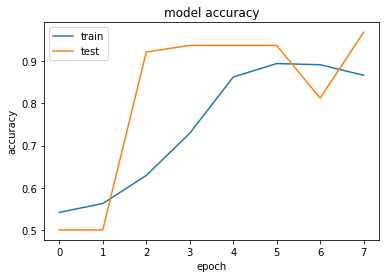

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

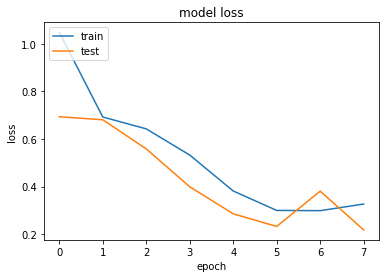

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()